In [1]:
# Fiting the model on our data and use it to make predictions
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

Three ways to evaluate Scikit-Learn models/estimators:

    1. Estimator's Built in Score Method
    2. The 'scoring' parameter
    3. Problem Specific metric function


In [2]:
from sklearn.model_selection import cross_val_score


from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
# housing; # gets downloaded as dictionary
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])



X = housing_df.drop('target',axis=1)
y = housing_df['target']




X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# create random forest model
model = RandomForestRegressor()
model.fit(X_train,y_train)

# check the score of model
model.score(X_test,y_test)

0.8094457087137817

In [6]:
cross_val_score(model,X,y,cv=4)

array([0.56810597, 0.74455533, 0.63245475, 0.61779287])

In [7]:
# can we take an average of these scores shown as the output above
import pandas as pd

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
hd = pd.read_csv('heart-disease.csv')

X = hd.drop('target',axis=1)
y = hd['target']
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf = RandomForestClassifier()
cross_val_score=cross_val_score(clf,X,y,cv=5)


In [10]:
np.mean(cross_val_score)

0.8248087431693989

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [13]:
from sklearn.metrics import roc_curve

In [14]:
# Make predictions with probabilites 
clf.fit(X_train,y_train)

y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [15]:
y_probs_positive = y_probs[:,1]


In [16]:
fpr, tpr, threshold = roc_curve(y_test,y_probs_positive)

In [17]:
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [18]:
# create a function to plot roc curves

In [19]:
import matplotlib.pyplot as plt

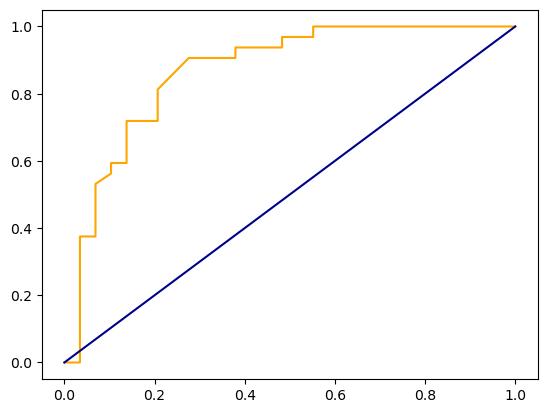

In [22]:
def plot_fp(fpr, tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',ls='-')
    plt.show()

plot_fp(fpr,tpr)

In [23]:
from sklearn.metrics import roc_auc_score

In [25]:
roc_auc_score(y_test,y_probs_positive)

0.8669181034482759